# Logistic regression implementation
* Logistic regression is the workhorse of machine learning.
* Before deep learning era, logistic regression was the default choice for solving real life classification problems with hundreds of
thousands of features.
* It works in binary, multi-class and multi-label classification set ups.


## Objective

In this colab, we will implement binary logistic regression
and employ it for solving a couple of classification problems.
In one of the setting, we have linearly separable classes and the other one has non-linear decision boundary between classes

The first problem can be addressed with basic logistic regresion classifier, while the second problem require an additional step of polynomial transformation before using logistic regression

These cases will provide an idea about how to use logistic regression to solve classification problems in these two settings. We will set up
more such cases for practice in programming exercise.

Let's begin by imp
entation:
* `numpy` for implementing components of logistic regression in vectorized form.
*  `matplotlib` and seaborn for visualization.
* `Math` and `Latex` libraries for proper rendering of mathematical expressions in colab.

In [ ]:
from IPython.display import display, Math, Latex
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

As a good practice , set the random seed in order to reproduce same results across different runs of this colab


> We are setting it as 1234



In [ ]:
np.random.seed(1234)

## Implementation

In the first part of this excercise, we will implement individual components of binary logistic regression one by one

## Model
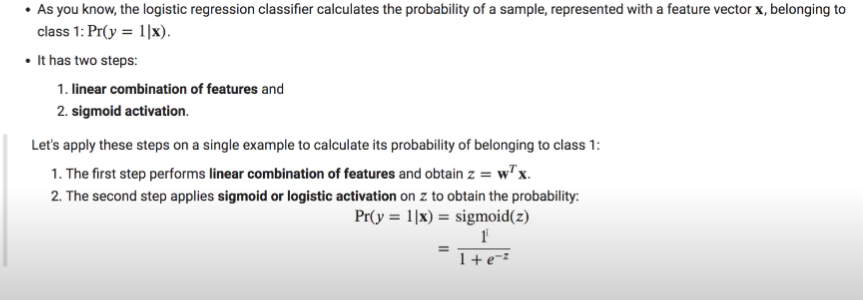

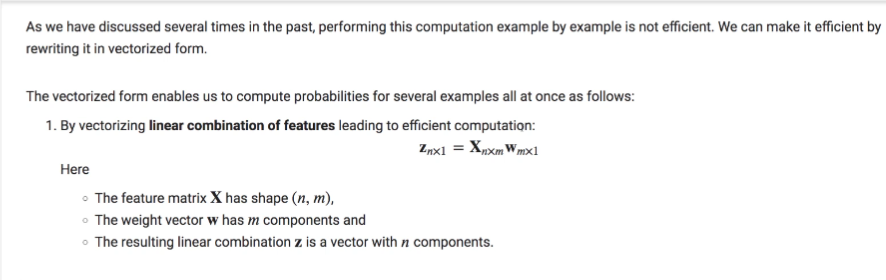

In [ ]:
# Lets' implemet linear combination in vectorized form
def linear_combination(X,w):

  return X @ w

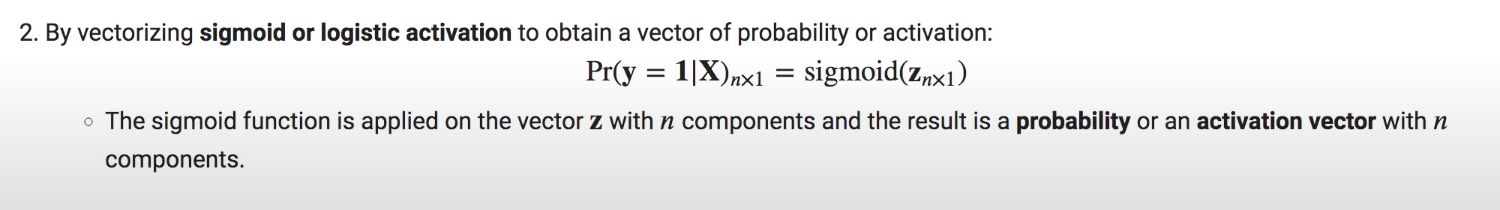

In [ ]:
# Let's implement sigmoid function in a vectorized form

def sigmoid(z):

  return 1/(1 + np.exp(-z))
   

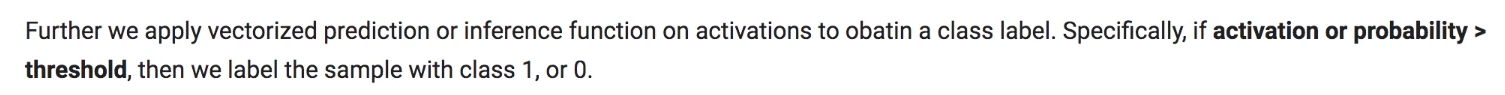

In [ ]:
def predict(X, w, threshold):

  return np.where(sigmoid(linear_combination(X, w)) > threshold, 1, 0)

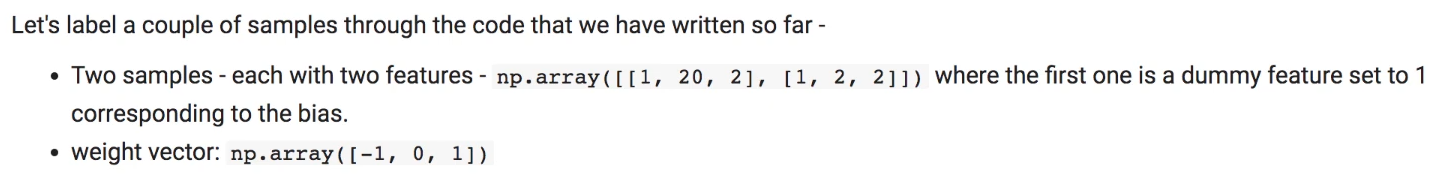

In [ ]:
feature_matrix  = np.array([[1, 20, 2], [1, 2, 2]])
weight_vector = np.array([-1, 0, 1])

print('Shape of feature matrix', feature_matrix.shape)
print('Shape of weight vector', weight_vector.shape)

class_labels = predict(feature_matrix, weight_vector, 0.5)

print('Shape of the output is', class_labels.shape)
print('The class label vector is', class_labels)


Shape of feature matrix (2, 3)
Shape of weight vector (3,)
Shape of the output is (2,)
The class label vector is [1 1]


## Loss Function

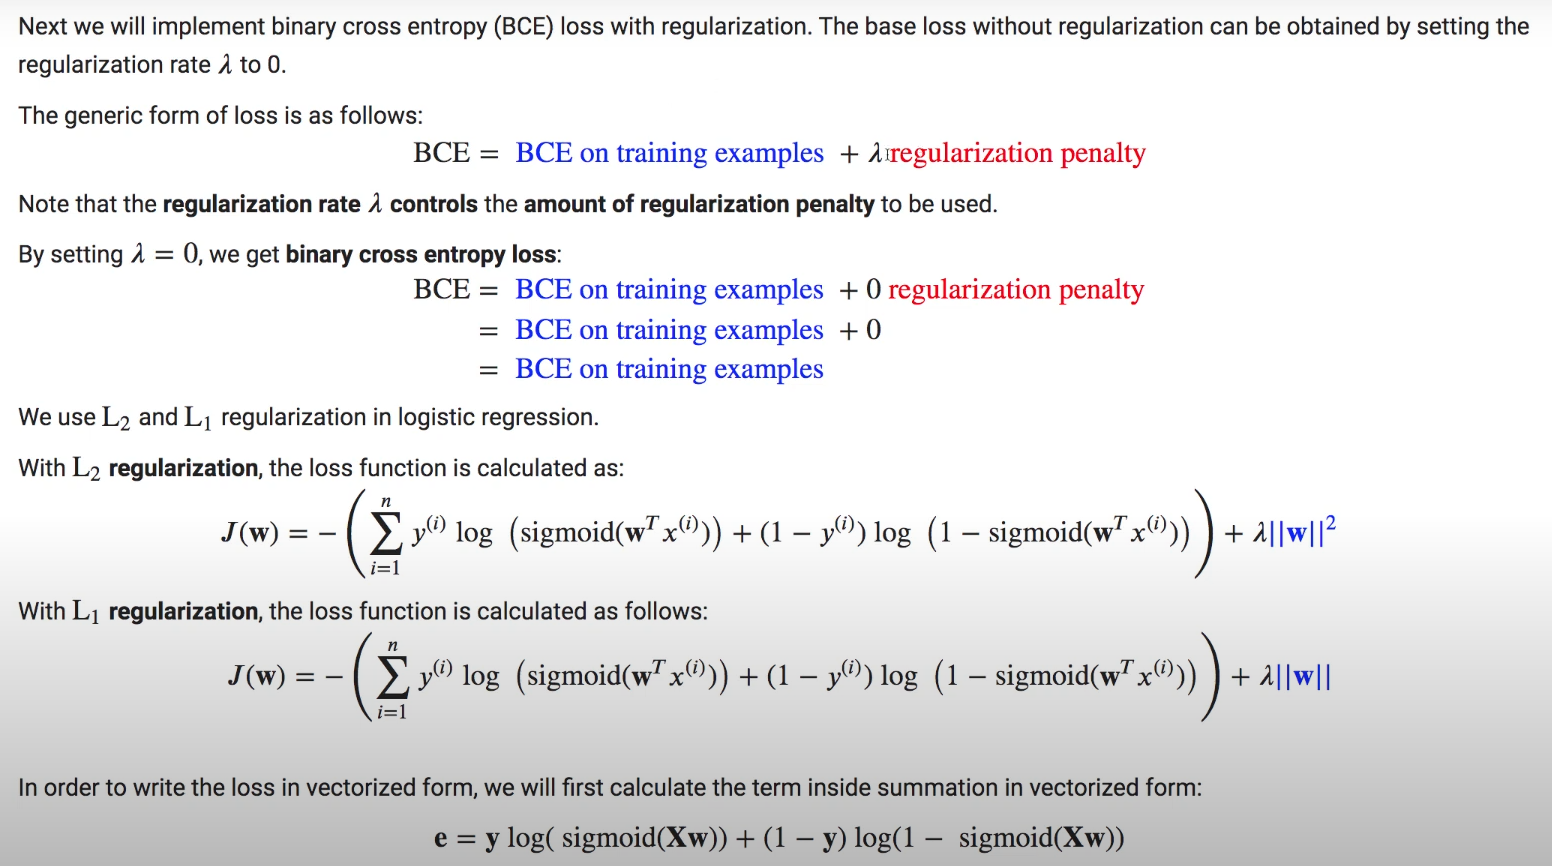

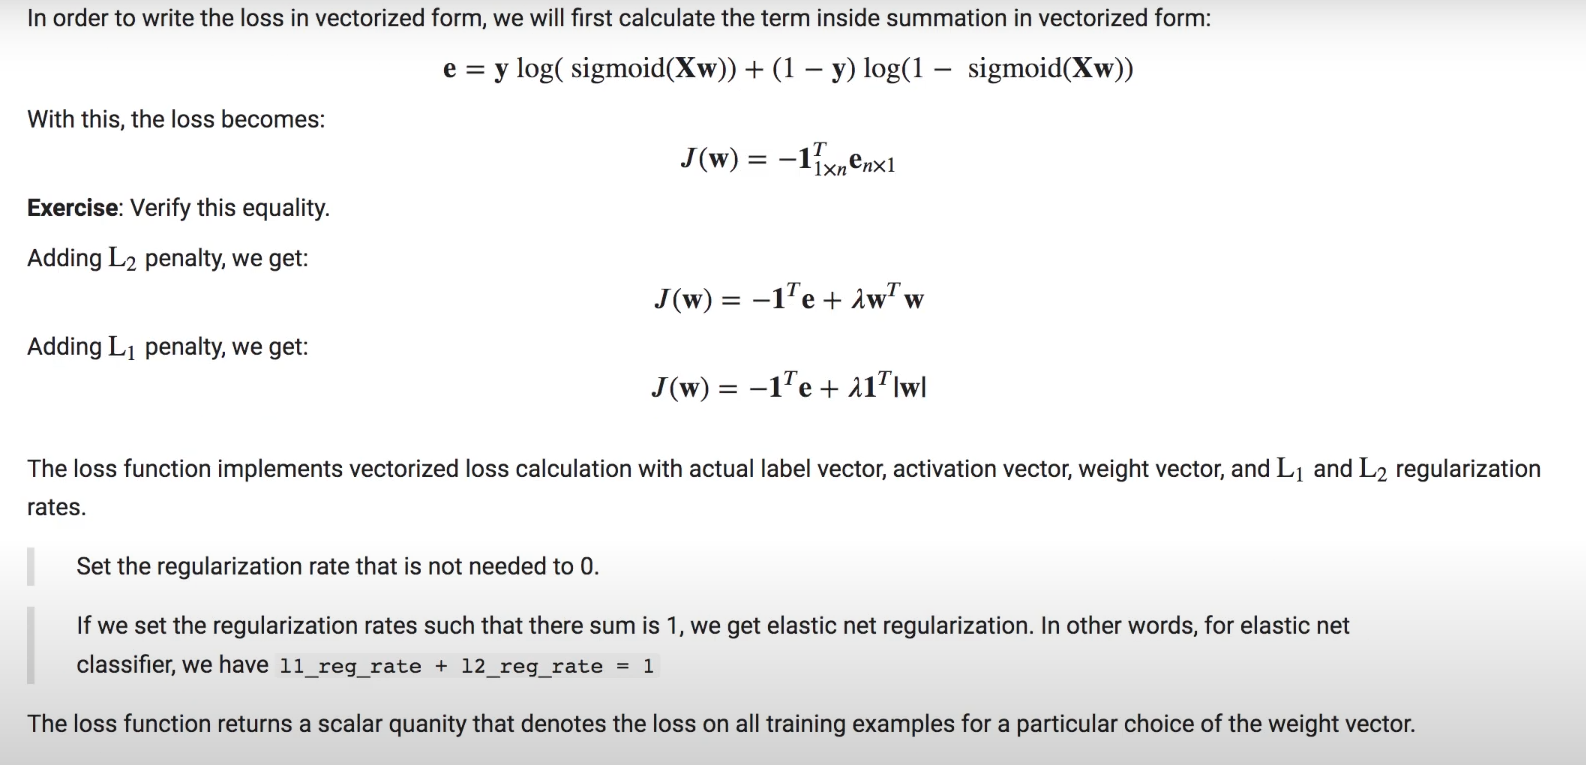

In [ ]:
def loss(y, sigmoid_vector, weight_vector, l1_reg_rate, l2_reg_rate):
  return (-1*(y*np.log(sigmoid_vector) + (1 - y)*np.log(1 - sigmoid_vector)))  
  + l2_reg_rate* np.dot(weight_vector, weight_vector)
  + l1_reg_rate * np.sum(np.abs(weight_vector))



## Optimization

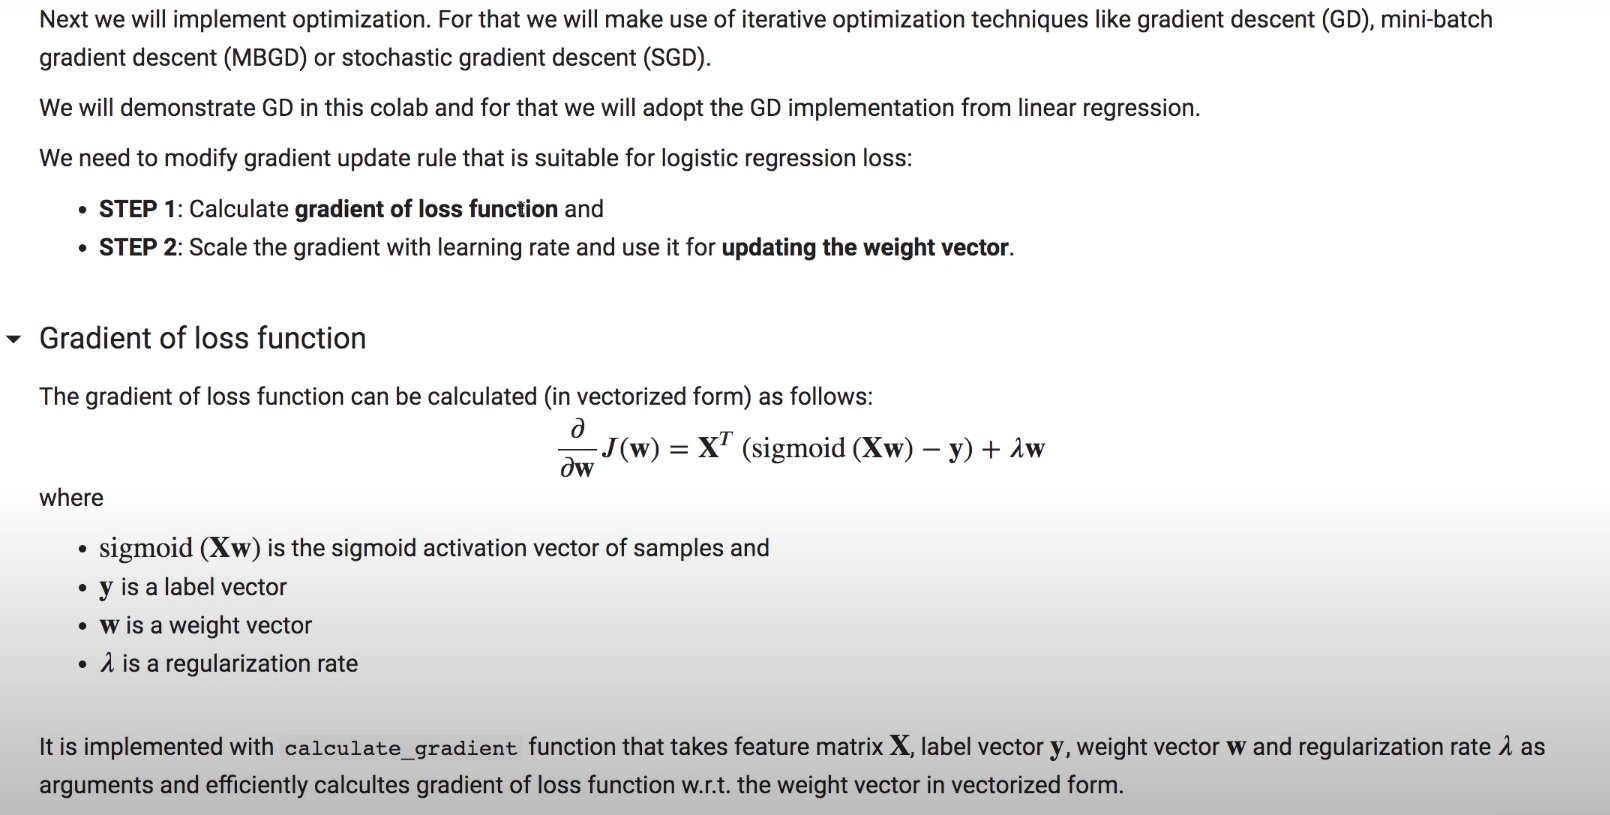

In [ ]:
def calculate_gradient(X, y, w, reg_rate):
  
  return np.transpose(X)*sigmoid(linear_combination(X, w) - y) + reg_rate * w

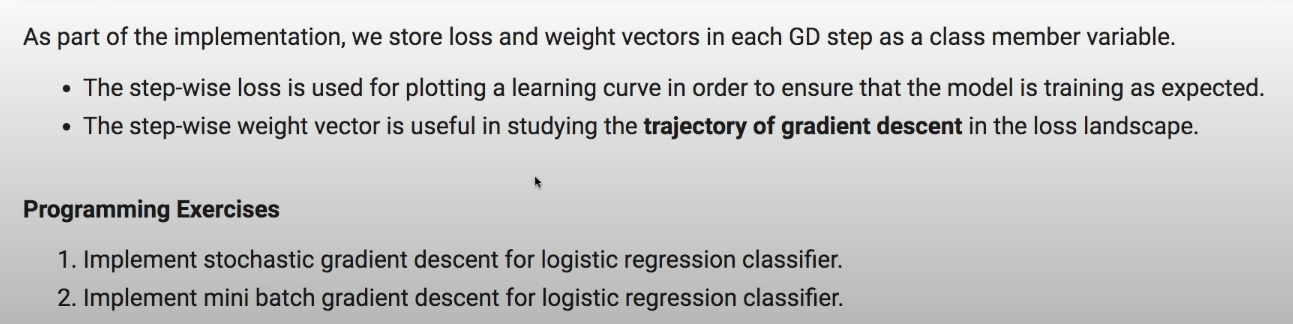

## Logistic regression class implementation

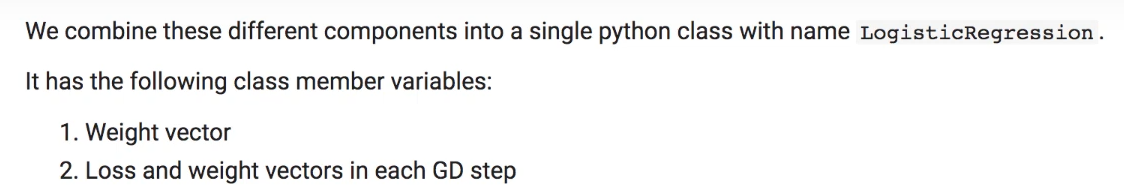

In [ ]:
class LogisticRegression(object):
  
  def self_weight_vector(self, w):
    self.w = w
    


  def linear_combination(self, X):
    return X @ self.w

  def sigmoid(self, z):
    return 1/(1 + np.exp(-z))

  def activation(self, X):

    return (self.sigmoid(self.linear_combination(X)))

  def predict(self, x, threshold = 0.5):
    return (self.activation(x) > threshold).astype(int)

  def loss(self, X, y, reg_rate):
    predicted_prob = self.activation(X)
    return -1 * (np.sum(y * np.log(predicted_prob) + (1 - y) * 
               np.log(1 - predicted_prob))) + reg_rate * np.dot(self.w, self.w)
  
  def calculate_gradient(self, X, y, reg_rate):
    return np.transpose(X) @ (self.activation(X)- y) + reg_rate * self. w          
  
  def update_weights(self, grad, lr):
    return (self.w - lr * grad)

  def gd(self, X, y, num_epochs, lr, reg_rate):
    
    self.w = np.zeros(X.shape[1])
    self.w_all = []
    self.err_all = []
    
    for i in range(num_epochs):
      dJdW = self.calculate_gradient(X, y, reg_rate)
      self.w_all.append(self.w)
      self.err_all.append(self.loss(X, y, reg_rate))
      self.w = self.update_weights(dJdW, lr)
    return self.w

 

# Demo #1: Logistic regression for linearly separable binary classification

In the first experiment, we will use logistic regression to learn decision boundary between two linearly separable classes.\
**STEP 1** : As the first step, we will generate two linearly separable classes with 50 samples each. Each example is represented with two features

In [ ]:
def create_toy_data():
  x0 = np.random.normal(size = 50).reshape(-1,2) - 1
  x1 = np.random.normal(size = 50).reshape(-1,2) + 1
  return np.concatenate([x0 , x1]), np.concatenate([np.zeros(25), np.ones(25)])

In [ ]:
feature_matrix , label_vector = create_toy_data()
print(feature_matrix.shape)
print(label_vector.shape)

(50, 2)
(50,)


In [ ]:
assert feature_matrix.shape[0] == label_vector.shape[0]

**STEP 2** Add a dummy feature.

In [ ]:
#@title Polynomial Transformation
import numpy as np
import functools
import itertools

def get_combinations(x , degree):# This function takes ‘degree’ as input here ‘degree’ represents the size of different combinations that are possible for x
  return itertools.combinations_with_replacement(x,degree)

def compute_new_features(items):
  return functools.reduce(lambda x,y: x * y ,items) #it multiplies first two element and then multiply the result with succeding element until the list is empty
  # if items = [1,2,3,4] then the above function returns ((1*2)*3)*4

def polynomial_transform(x,degree,logging = False):
  if x.ndim == 1:
    x = x[:,None]
  x_t = x.transpose()
  features  = [np.ones(len(x))]

  if logging:
    print('Input',x)  

  for degree in range(1,degree+1):
    for items in get_combinations(x_t,degree):
      features.append(compute_new_features(items))
      if logging:
        print(items, ':',compute_new_features(items))
  if logging:
    print(np.asarray(features).T)
  return np.asarray(features).T

In [ ]:
feature_matrix_bias = polynomial_transform(feature_matrix , degree =1)

In [ ]:
feature_matrix_bias.shape

(50, 3)

**STEP 3**: Separate data into training and test sets


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature_matrix_bias ,
                                                    label_vector)

It is good practice to assert the training feature matrix and labels have the same number of rows. The same assertion should be extended to the test set

In [ ]:
assert x_train.shape[0] == y_train.shape[0]
assert x_test.shape[0] == y_test.shape[0]

In [ ]:
x_train.shape

(37, 3)

**STEP 4**: Let's visualize the training data to get an idea of its distribution

Note that it wont be possible to visualise real world datasets as there are many features. In this case, we have only two features in our dataset and hence we can visualize it.


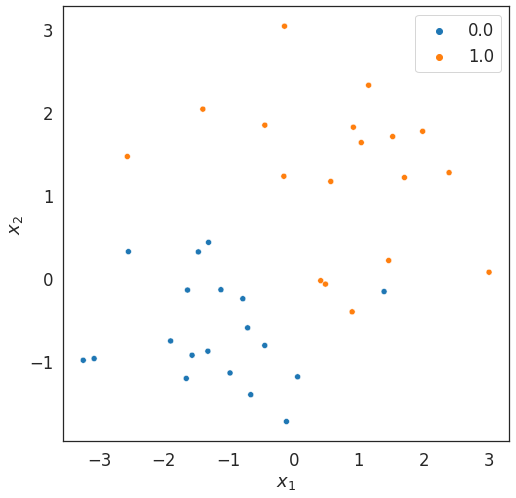

In [ ]:
sns.set_style('white')
f = plt.figure(figsize = (8 , 8))
sns.set_context('notebook', font_scale = 1.5 , rc = {'lines.linewidth': 2.5} )


sns.scatterplot(data = x_train , x = x_train[:,-1], y = x_train[:,-2], hue = y_train)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()


**STEP 5** We are all set to training a logistic regression on this problem.


1.   First instantiate a logistic regression object
2.   Train the model with gradient descent procedure on the given training set



In [ ]:
log_reg = LogisticRegression()
log_reg.gd( x_train , y_train, num_epochs = 100, reg_rate = 0, lr =1e-2)


array([-0.09756162,  2.53966629,  1.30442201])

Plot the learning curve

In [ ]:
def plot_learning_curve(err):
    plt.plot(np.arange(len(err)), err, 'r-')
    plt.xlabel('Iter#')
    plt.ylabel('loss')

In [ ]:
log_reg.err_all[:3]

[25.646445680717967, 20.195607491925326, 16.971613011745443]

In [ ]:
log_reg.loss

<bound method LogisticRegression.loss of <__main__.LogisticRegression object at 0x7f420a848810>>

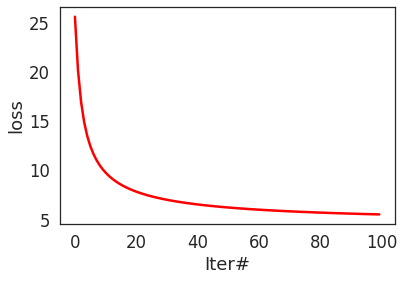

In [ ]:
plot_learning_curve(log_reg.err_all)

In [ ]:
sns.set_context(context='notebook',font_scale=1.5,rc={"lines.linewidth":2.5})

def visualize_model(X_train, labels, lsc, degree=1):
    f = plt.figure(figsize=(8,8))

    x1_min = np.min(x_train[:,1])
    x1_max = np.max(x_train[:,1])
    x2_min = np.min(x_train[:,2])
    x2_max = np.max(x_train[:,2])
    
    x1_test, x2_test = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100)) 
    x_test = np.array([x1_test, x2_test]).reshape(2,-1).T
    x_test_poly = polynomial_transform(x_test, degree=degree)
    y_test = lsc.predict(x_test_poly, 0.5)
    
    sns.scatterplot(data=x_train, x=x_train[:,1], y=x_train[:,2], hue=labels)
    plt.contourf(x1_test, x2_test, y_test.reshape(100,100), alpha=0.5, levels=np.linspace(0,1,3))
    plt.gca().set_aspect('equal', adjustable='box')

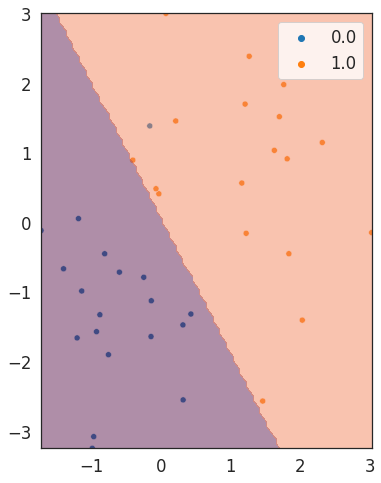

In [ ]:
visualize_model(x_train, y_train, log_reg)

**STEP 6** : Model evaluation
The next step is to use the model for makiing predictions on the new inputs. Let's predict labels on the test set - that was set aside for evaluating model performance

In [ ]:
y_test_hat = log_reg.predict(x_test)

We compare these predictions with the actual labels and generate a classification report that includes several metrics like confusion matrix, precision, recall, F1-score etc

In [ ]:
from sklearn.metrics import classification_report
print( classification_report(y_test, y_test_hat, zero_division = 0))

              precision    recall  f1-score   support

         0.0       1.00      0.67      0.80         6
         1.0       0.78      1.00      0.88         7

    accuracy                           0.85        13
   macro avg       0.89      0.83      0.84        13
weighted avg       0.88      0.85      0.84        13



# Demo #2: Polynomial least square classification

In the second demonstartion,  we will use logistic regression to fit a circular decision boundary between two classes

**STEP 1**: For this demonstration, we will generate samples from two classes such that they are separated by a circular decision boundary

In [ ]:
from sklearn.datasets import make_circles
feature_matrix, label_vector  = make_circles()

As a sanity check,  compare the first element of shape of feature matrix and label vector. Make sure they are identical

In [ ]:
assert feature_matrix.shape[0] == label_vector.shape[0]

The assertion suceed - which means both feature matrix and label list have the same number of rows